In [244]:
# Import necessary libraries
import pandas as pd
from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, precision_recall_curve

In [245]:
data = pd.read_csv('rees46_customer_model.csv')

In [246]:
data.head()

,row_id,user_id,length_mean,start_year_mean,start_yearday_mean,start_month_mean,start_monthday_mean,start_week_mean,start_weekday_mean,start_isweekend_mean,...,purchase_latent_factor14,purchase_latent_factor15,purchase_latent_factor16,purchase_latent_factor17,target_event,target_revenue,target_customer_value,time_step,target_customer_value_lag1,target_actual_profit
0,31,522576412,10133.678750,2019.3250,241.65000,8.400000,16.875000,33.825000,4.225000,0.300000,...,0.633005,0.063525,0.000000,0.000000,0,3403.83,171.760358,0,90.148425,-13.279611
1,53,551695186,5.359195,2019.3620,222.05173,7.827586,14.655172,31.448277,4.034483,0.258621,...,0.395069,0.267275,0.000000,0.000000,1,0.00,387.102758,0,445.168171,3.592337
2,65,561472000,4.885714,2019.0000,297.54285,10.114285,21.000000,43.142857,2.942857,0.285714,...,0.000000,0.000000,0.000000,0.000000,1,0.00,347.097991,0,399.162689,3.216008
3,85,585643355,4175.082759,2019.8966,106.00000,3.931035,17.655172,15.896552,3.655172,0.206897,...,0.165644,0.000000,0.165603,0.263806,0,937.86,279.270244,0,321.607950,-13.185855
4,133,520792937,3.325601,2019.3196,212.86598,7.556701,13.711340,30.989690,3.958763,0.350515,...,0.000000,0.000000,0.048937,0.000000,1,0.00,91.360471,0,105.064542,0.732248


In [247]:
data.shape

(112610, 276)

In [248]:
data.describe()

,row_id,user_id,length_mean,start_year_mean,start_yearday_mean,start_month_mean,start_monthday_mean,start_week_mean,start_weekday_mean,start_isweekend_mean,...,purchase_latent_factor14,purchase_latent_factor15,purchase_latent_factor16,purchase_latent_factor17,target_event,target_revenue,target_customer_value,time_step,target_customer_value_lag1,target_actual_profit
count,112610.000000,1.126100e+05,112610.000000,112610.000000,112610.000000,112610.000000,112610.000000,112610.000000,112610.000000,112610.000000,...,112610.000000,112610.000000,112610.000000,112610.000000,112610.000000,112610.00000,112610.000000,112610.000000,112610.000000,112610.000000
mean,56305.500000,5.472396e+08,1047.309320,2019.260254,243.120087,8.502866,15.256698,34.548944,4.108710,0.285502,...,0.159366,0.086480,0.072732,0.063373,0.320842,2881.02671,429.596579,2.375224,360.470702,-7.812736
std,32507.851244,2.879266e+07,3963.163302,0.328376,89.288600,2.962692,4.117921,12.891144,0.672959,0.154733,...,0.340547,0.227210,0.215434,0.192535,0.466802,7639.03929,747.130914,1.813899,729.498867,8.470775
min,1.000000,4.209864e+08,0.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-290.189572,0.000000,-290.189572,-13.587740
25%,28153.250000,5.184146e+08,2.507074,2019.000000,193.031225,6.826186,13.360000,26.762003,3.750000,0.194754,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,124.529734,1.000000,43.965576,-13.235331
50%,56305.500000,5.460710e+08,4.098996,2019.083400,281.657520,10.000000,15.625000,40.500000,4.080000,0.274725,...,0.000000,0.000000,0.000000,0.000000,0.000000,688.01500,245.674708,2.000000,183.334410,-13.145774
75%,84457.750000,5.680586e+08,8.144096,2019.457200,308.364963,10.666667,17.618830,44.178853,4.434782,0.360000,...,0.087218,0.012133,0.000000,0.000000,1.000000,2887.94500,482.026890,4.000000,418.039302,0.887920
max,112610.000000,6.338577e+08,79235.610606,2020.000000,365.000000,12.000000,31.000000,52.000000,7.000000,1.000000,...,4.173220,3.525814,3.232348,3.039872,1.000000,527776.78000,40582.335231,6.000000,40582.335231,189.965710


In [249]:
selected_features = [
    'session_count_month_lag0', 
    'purchase_recency_min', 
    'purchase_number_sum', 
    'purchase_number_stddev', 
    'session_recency_min', 
    'haspurchase_sum', 
    'purchase_count_month_ma3', 
    'customer_value_month_lag0', 
    'customer_value_month_ma3',
    'purchase_revenue_sum'
]

In [250]:
target_column = 'target_event'
X = data[selected_features]
y = data[target_column]

In [251]:
print(X.isnull().sum())

session_count_month_lag0     0
purchase_recency_min         0
purchase_number_sum          0
purchase_number_stddev       0
session_recency_min          0
haspurchase_sum              0
purchase_count_month_ma3     0
customer_value_month_lag0    0
customer_value_month_ma3     0
purchase_revenue_sum         0
dtype: int64


In [252]:
target_counts = data['target_event'].value_counts()
labels = ['No Event (0)', 'Event (1)']  
sizes = target_counts.values

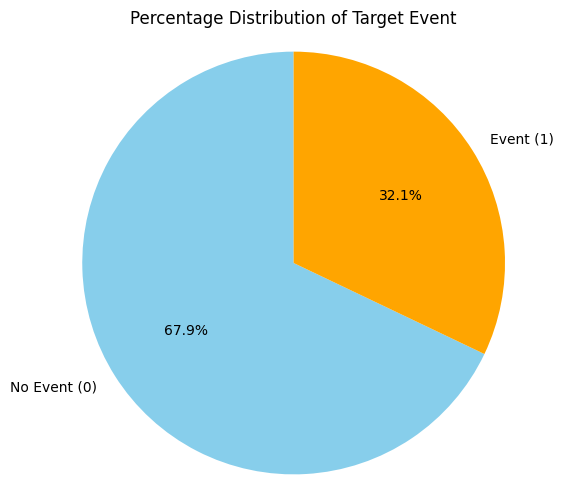

In [253]:
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Percentage Distribution of Target Event')
plt.axis('equal')  
plt.show()

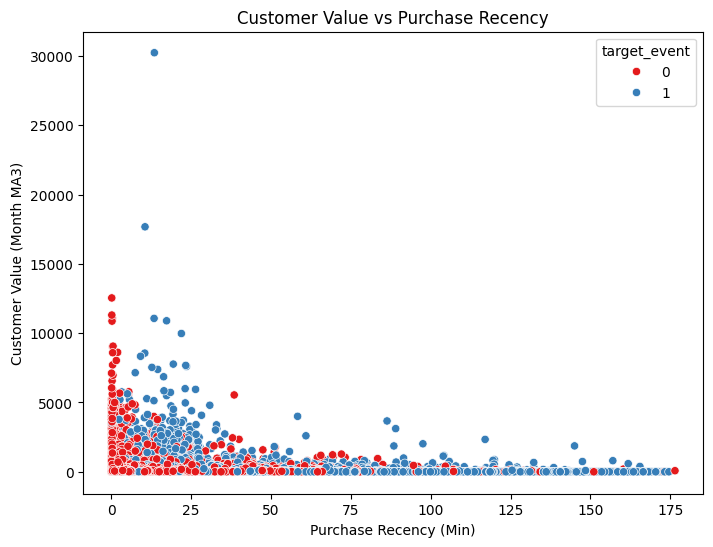

In [254]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='purchase_recency_min', 
    y='customer_value_month_ma3', 
    hue='target_event', 
    data=data, 
    palette='Set1'
)
plt.title('Customer Value vs Purchase Recency')
plt.xlabel('Purchase Recency (Min)')
plt.ylabel('Customer Value (Month MA3)')
plt.show()


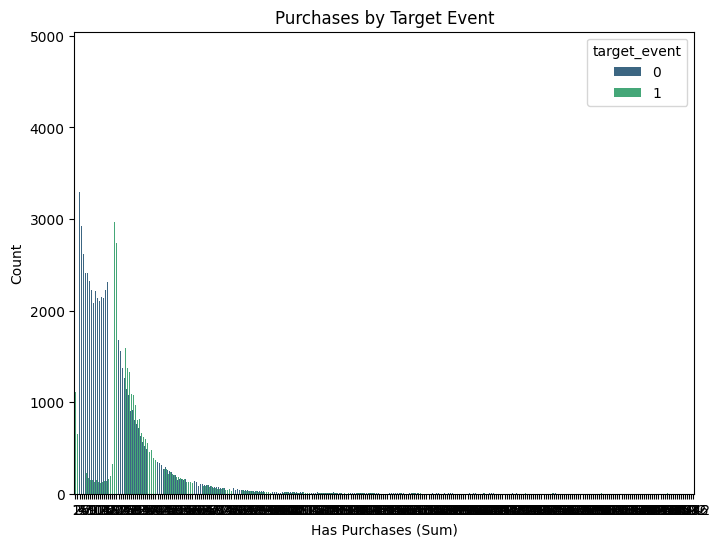

In [255]:
plt.figure(figsize=(8, 6))
sns.countplot(x='haspurchase_sum', hue='target_event', data=data, palette='viridis')
plt.title('Purchases by Target Event')
plt.xlabel('Has Purchases (Sum)')
plt.ylabel('Count')
plt.show()


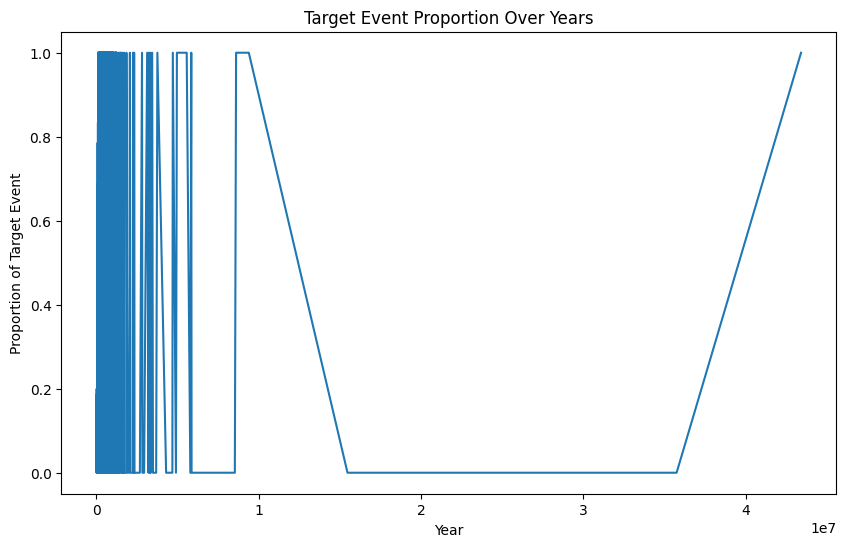

In [256]:
data.groupby('start_year_sum')['target_event'].mean().plot(kind='line', figsize=(10, 6))
plt.title('Target Event Proportion Over Years')
plt.xlabel('Year')
plt.ylabel('Proportion of Target Event')
plt.show()


In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [258]:
xgb_model = XGBClassifier(
    n_estimators=380,
    learning_rate=0.01,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,  
    eval_metric='logloss'  
)

In [259]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=380,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [260]:
y_pred = xgb_model.predict(X_test)

In [261]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[14456   840]
 [ 2390  4836]]


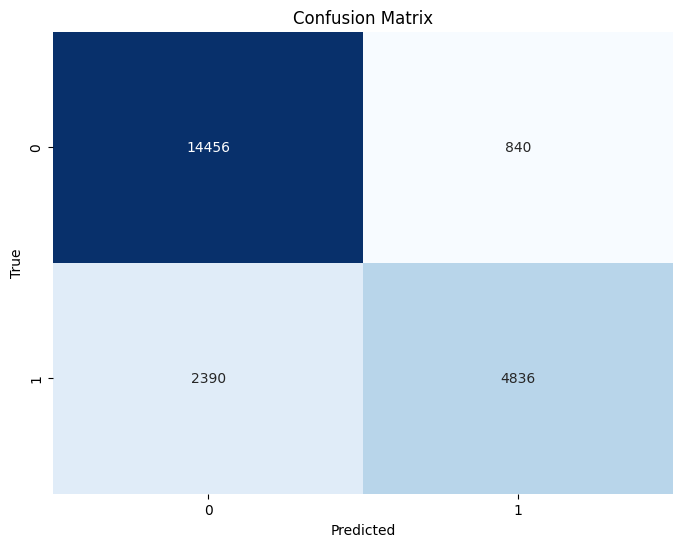

In [262]:
y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [263]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15296
           1       0.85      0.67      0.75      7226

    accuracy                           0.86     22522
   macro avg       0.86      0.81      0.82     22522
weighted avg       0.86      0.86      0.85     22522



In [264]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Accuracy Score:
0.8565846727644081


<function matplotlib.pyplot.show(close=None, block=None)>

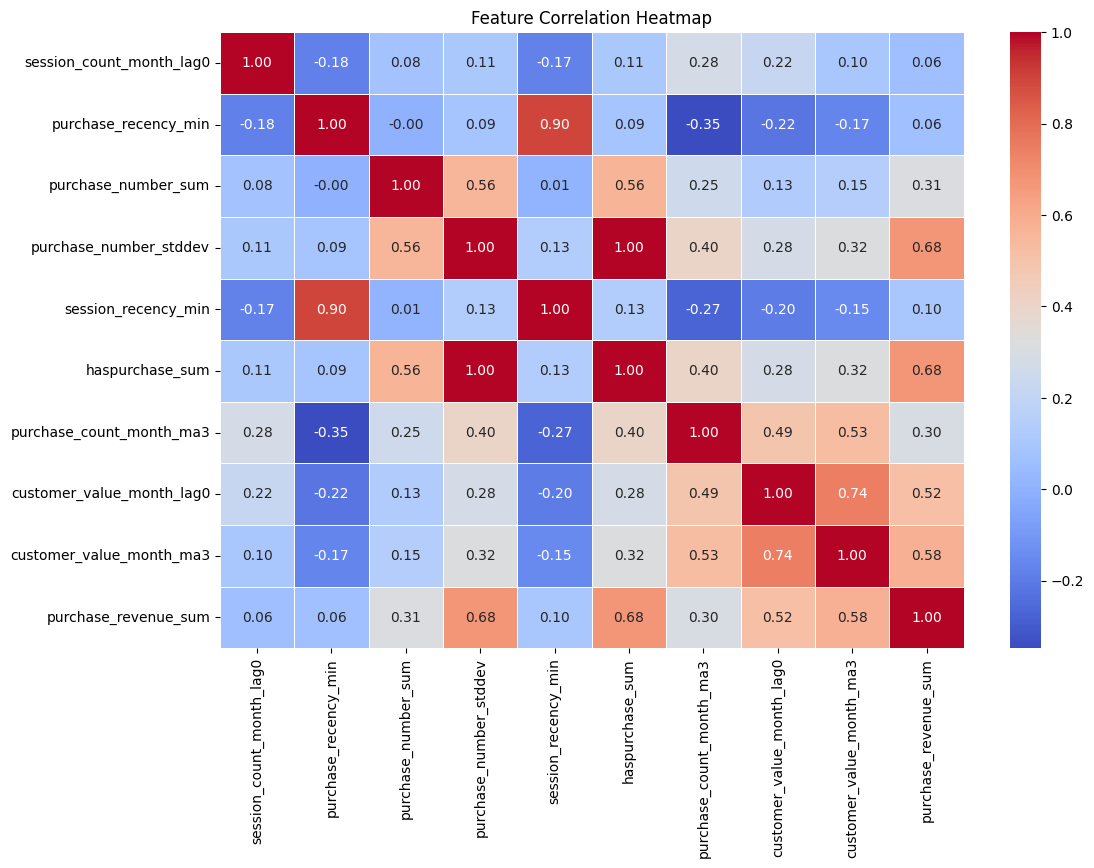

In [265]:
plt.figure(figsize=(12, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show

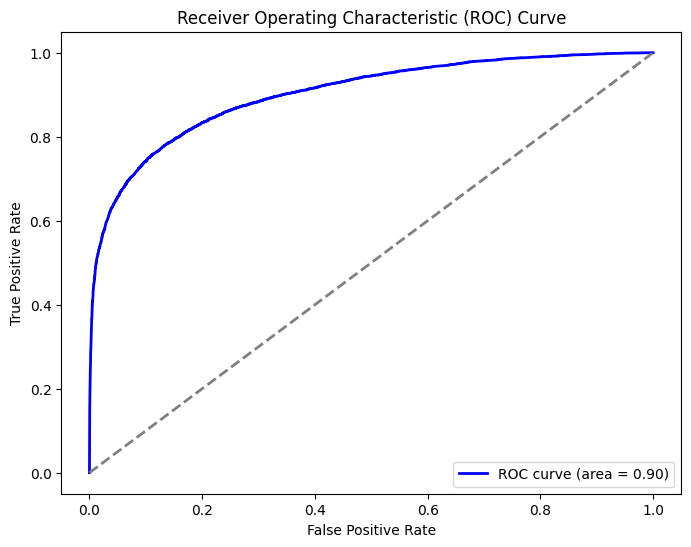

In [266]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

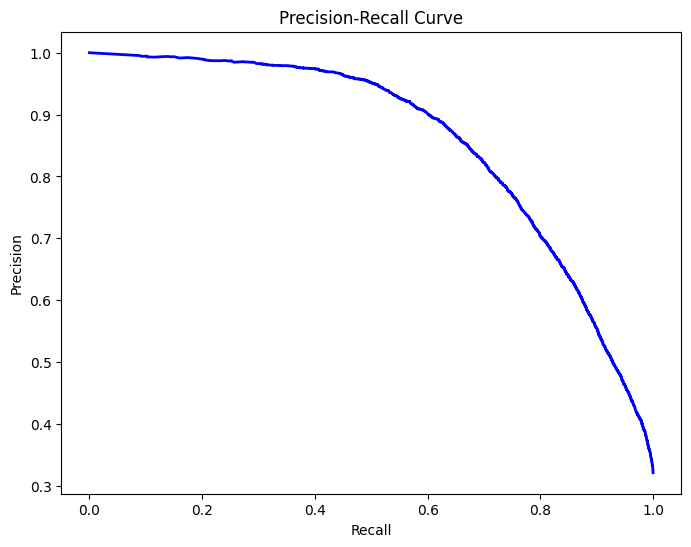

In [267]:
precision, recall, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()